In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#Load dataset
df = pd.read_csv('C:/Users/joshi/OneDrive/Desktop/customer_reviews.csv')
print("Dataset size:", len(df))
print(df.head())

Dataset size: 40
                                review_text     label
0  I love this product, it works perfectly!  positive
1      Fantastic quality and fast delivery.  positive
2     Absolutely amazing! Highly recommend.  positive
3          Very satisfied with my purchase.  positive
4                    Great value for money.  positive


In [17]:
#Prepare data
X = df['review_text']
y = df['label']

In [19]:
#Vectorize text
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
#Train model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=2000)

In [23]:
#Predictions & evaluation
y_pred = model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.125

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
    positive       0.20      0.25      0.22         4

    accuracy                           0.12         8
   macro avg       0.10      0.12      0.11         8
weighted avg       0.10      0.12      0.11         8



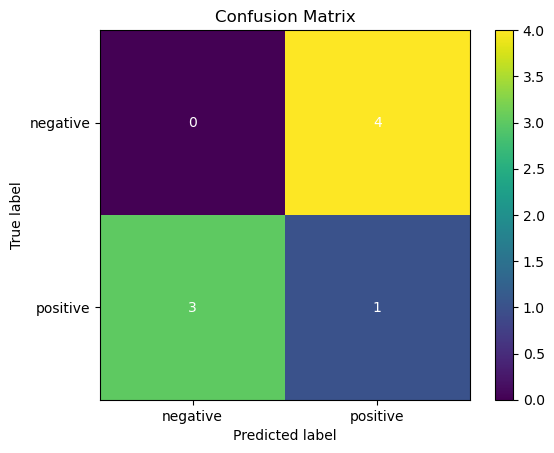

In [25]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ['negative', 'positive'])
plt.yticks([0, 1], ['negative', 'positive'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.colorbar()
plt.show()

In [37]:
#Test on new samples
samples = ["Terrible experience, waste of money.",
]
samples_tfidf = vectorizer.transform(samples)
predictions = model.predict(samples_tfidf)
for review, sentiment in zip(samples, predictions):
    print(f"[{sentiment}] -> {review}")

[negative] -> Terrible experience, waste of money.
